In [0]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sparknlp.pretrained import PretrainedPipeline
from pyspark.sql.functions import from_unixtime, to_date, year, udf, explode, split, col, length, rank, dense_rank, avg, sum

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
Out[2]: True

Load in data

In [0]:
# File location and type
file_location = "/FileStore/tables/music.json"
file_type = "json"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
reviews = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(reviews)

asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
1384719342,"List(0, 0)",5.0,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600
1384719342,"List(13, 14)",5.0,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]","03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000
1384719342,"List(1, 1)",5.0,"The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it.","08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000
1384719342,"List(0, 0)",5.0,Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging.,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000
1384719342,"List(0, 0)",5.0,This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing.,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800
B00004Y2UT,"List(0, 0)",5.0,"So good that I bought another one. Love the heavy cord and gold connectors. Bass sounds great. I just learned last night how to coil them up. I guess I should read instructions more carefully. But no harm done, still works great!","12 21, 2012",A2A039TZMZHH9Y,"Bill Lewey ""blewey""",The Best Cable,1356048000
B00004Y2UT,"List(0, 0)",5.0,"I have used monster cables for years, and with good reason. The lifetime warranty is worth the price alone. Simple fact: cables break, but getting to replace them at no cost is where it's at.","01 19, 2014",A1UPZM995ZAH90,Brian,Monster Standard 100 - 21' Instrument Cable,1390089600
B00004Y2UT,"List(0, 0)",3.0,I now use this cable to run from the output of my pedal chain to the input of my Fender Amp. After I bought Monster Cable to hook up my pedal board I thought I would try another one and update my guitar. I had been using a high end Planet Waves cable that I bought in the 1980's... Once I found out the input jacks on the new Monster cable didn't fit into the Fender Strat jack I was a little disappointed... I didn't return it and as stated I use it for the output on the pedal board. Save your money... I went back to my Planet Waves Cable...I payed $30.00 back in the eighties for the Planet Waves which now comes in at around $50.00. What I'm getting at is you get what you pay for. I thought Waves was a lot of money back in the day...but I haven't bought a guitar cable since this one...20 plus years and still working...Planet Waves wins.,"11 16, 2012",AJNFQI3YR6XJ5,"Fender Guy ""Rick""",Didn't fit my 1996 Fender Strat...,1353024000
B00004Y2UT,"List(0, 0)",5.0,Perfect for my Epiphone Sheraton II. Monster cables are well c

In [0]:
# Create a view or table

temp_table_name = "reviews"
reviews.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select reviewText, overall from `reviews`

reviewText,overall
"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",5.0
"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",5.0
"The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it.",5.0
Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging.,5.0
This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing.,5.0
"So good that I bought another one. Love the heavy cord and gold connectors. Bass sounds great. I just learned last night how to coil them up. I guess I should read instructions more carefully. But no harm done, still works great!",5.0
"I have used monster cables for years, and with good reason. The lifetime warranty is worth the price alone. Simple fact: cables break, but getting to replace them at no cost is where it's at.",5.0
I now use this cable to run from the output of my pedal chain to the input of my Fender Amp. After I bought Monster Cable to hook up my pedal board I thought I would try another one and update my guitar. I had been using a high end Planet Waves cable that I bought in the 1980's... Once I found out the input jacks on the new Monster cable didn't fit into the Fender Strat jack I was a little disappointed... I didn't return it and as stated I use it for the output on the pedal board. Save your money... I went back to my Planet Waves Cable...I payed $30.00 back in the eighties for the Planet Waves which now comes in at around $50.00. What I'm getting at is you get what you pay for. I thought Waves was a lot of money back in the day...but I haven't bought a guitar cable since this one...20 plus years and still working...Planet Waves wins.,3.0
Perfect for my Epiphone Sheraton II. Monster cables are well constructed. I have several and never had any problems with any of them over the years. Got this one because I wanted the 90 degree plug.,5.0
Monster makes the best cables and a lifetime warranty doesnt hurt either. This isnt their top of the line series but it works great with my bass guitar rig and has for some time. You cant go wrong with Monster Cables.,5.0


In [0]:
reviews.printSchema()

root
-- asin: string (nullable = true)
-- helpful: array (nullable = true)
 |-- element: long (containsNull = true)
-- overall: double (nullable = true)
-- reviewText: string (nullable = true)
-- reviewTime: string (nullable = true)
-- reviewerID: string (nullable = true)
-- reviewerName: string (nullable = true)
-- summary: string (nullable = true)
-- unixReviewTime: long (nullable = true)

Filter out null reviews

In [0]:
reviews = reviews.filter(reviews.reviewText.isNotNull())

In [0]:
reviews.createOrReplaceTempView('reviews')

How many reviews are there?

In [0]:
spark.sql('SELECT COUNT(*) FROM reviews').toPandas()

,count(1)
0,10261


Inspect a couple reviews

In [0]:
spark.sql('SELECT * FROM reviews LIMIT 2').toPandas()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1384719342,"[0, 0]",5.0,"Not much to write about here, but it does exac...","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600
1,1384719342,"[13, 14]",5.0,The product does exactly as it should and is q...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000


Which users have posted the most reviews?

In [0]:
query = '''
SELECT reviewerName, reviewerID, COUNT(*) as num_reviews
FROM reviews
GROUP BY reviewerID, reviewerName
ORDER BY num_reviews DESC
'''
spark.sql(query).show(truncate=50)

+-------------------------------+--------------+-----------+
 reviewerName| reviewerID|num_reviews|
+-------------------------------+--------------+-----------+
 StormJH1| ADH0O8UVJOT10| 42|
 David G|A1L7M2JXN4EZCR| 38|
 David W "Dave"|A15TYOEWBQYF0X| 38|
 Charlo|A2EZWZ8MBEDOLN| 36|
 Mike Tarrani "Jazz Drummer"|A2NYK9KWFMJV4Y| 34|
 Captn' Bob|A1MVH1WLYDHZ49| 32|
guitfiddleblue "guitfiddleblue"|A1SD1C8XK3Z3V1| 32|
 MetalFan|A1GMWTGXW682GB| 29|
 Dako "Dako"|A34O0KQV4QXWNQ| 28|
 David Burch|A1LQC225SE8UNI| 27|
 aceofbase| AJK15Q9JOEHRH| 25|
 AF "Whigs"|A22Z554ZQ8NFPC| 25|
 grandpa "Randy"|A1DVUFG2QSJ6IK| 24|
 G. Thomas "Tom"|A3M1PLEYNDEYO8| 24|
 StudioDude| A2F92AOWTIUIB| 23|
 R. W. Milyard "GearJunky"| AKYDGCKCY7H9F| 23|
 Michael Livote "dragon2knight"| A781ITP3HE2N5| 22|
 bayou bob|A26SN2CVQM4FKM| 21|
 Richard "Richard"|A3UXW18DP4WSD6| 21|
 Samuel Chell| A6FIAB28IS79| 21|
+-------------------------------+--------------+-----------+
only showing top 20 rows

Number of reviews over time

Obviously as Amazon became more popular, the number of reviews grew

In [0]:
query = '''
SELECT COUNT(*) as num_reviews_per_year, YEAR(FROM_UNIXTIME(unixReviewTime)) AS year 
FROM reviews 
GROUP BY year 
ORDER BY year DESC
'''

spark.sql(query).toPandas()

,num_reviews_per_year,year
0,2679,2014
1,4055,2013
2,1936,2012
3,1007,2011
4,350,2010
5,128,2009
6,63,2008
7,22,2007
8,10,2006
9,4,2005


In [0]:
spark.sql('SELECT YEAR(FROM_UNIXTIME(unixReviewTime)) AS year FROM reviews').toPandas().hist()

Out[12]: array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2fa26ee48>]],
 dtype=object)

It seems most reviews are actually 5 stars!

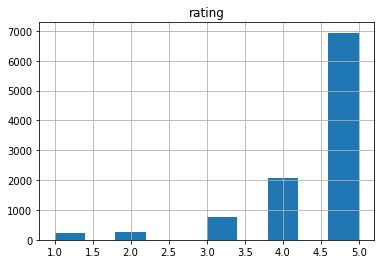

In [0]:
%matplotlib inline
spark.sql('SELECT overall AS rating FROM reviews').toPandas().hist();

### Show products with the most reviews

TODO: Need to pull out all products that appear in the reviews from product metadata.

In [0]:
query = '''
SELECT asin, COUNT(*) as num_reviews
FROM reviews
GROUP BY asin
ORDER BY num_reviews DESC
'''
spark.sql(query).show(truncate=50)

+----------+-----------+
 asin|num_reviews|
+----------+-----------+
B003VWJ2K8| 163|
B0002E1G5C| 143|
B0002F7K7Y| 116|
B003VWKPHC| 114|
B0002H0A3S| 93|
B0002CZVXM| 74|
B0006NDF8A| 71|
B0009G1E0K| 69|
B0002E2KPC| 68|
B0002GLDQM| 67|
B004XNK7AI| 65|
B005FKF1PY| 63|
B00646MZHK| 62|
B001PGXHX0| 58|
B0002GMGYA| 58|
B0018TIADQ| 57|
B000978D58| 57|
B0002D0CEO| 55|
B001PGXKC8| 55|
B000068NW5| 52|
+----------+-----------+
only showing top 20 rows

## Bag of Words
- We will use NLTK's list of stopwords to conduct stopword removal, and visualise results in wordclouds
- We will also remove punctuation and capitalization

In [0]:
import re
sw = stopwords.words("english")
def remove_stopwords(x):    
    string = ''
    for x in x.split(' '):
        if x.lower() not in sw:
            string += x + ' '
        else:
            pass
    return string

def lower(text):
  return text.lower()
  
def removePunctuation(text):
  return re.sub('[^A-Za-z0-9 ]+', '', text)  
  
# UDF = user defined function
nosw = udf(remove_stopwords)
rp = udf(removePunctuation)
lc = udf(lower)
# Register UDF with Spark
spark.udf.register("nosw", nosw)
spark.udf.register("rp", rp)
spark.udf.register("lc", lc)

# Creates a new column in reviews which contains the review with no stop words
reviews = reviews.withColumn('text_nosw', lc(rp(nosw('reviewText'))))

In [0]:
display(reviews)

asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,text_nosw
1384719342,"List(0, 0)",5.0,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600,much write here exactly supposed to filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy it honestly work despite pricing
1384719342,"List(13, 14)",5.0,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]","03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000,product exactly quite affordablei realized double screened arrived even better expectedas added bonus one screens carries small hint smell old grape candy used buy reminiscents sake cannot stop putting pop filter next nose smelling recording dif needed pop filter work well expensive ones may even come pleasing aroma like mine didbuy product
1384719342,"List(1, 1)",5.0,"The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it.","08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000,primary job device block breath would otherwise produce popping sound allowing voice pass noticeable reduction volume high frequencies double cloth filter blocks pops lets voice coloration metal clamp mount attaches mike stand secure enough keep attached goose neck needs little coaxing stay put it
1384719342,"List(0, 0)",5.0,Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging.,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000,nice windscreen protects mxl mic prevents pops thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging
1384719342,"List(0, 0)",5.0,This pop filter is great. It looks and performs like a studio filter. If you're recording vocals this will eliminate the pops that gets recorded when you sing.,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800,pop filter great looks performs like studio filter recording vocals eliminate pops gets recorded sing
B00004Y2UT,"List(0, 0)",5.0,"So good that I bought another one. Love the heavy cord and gold connectors. Bass sounds great. I just learned last night how to coil them up. I guess I should read instructions more carefully. But no harm done, still works great!","12 21, 2012",A2A039TZMZHH9Y,"Bill Lewey ""blewey""",The Best Cable,1356048000,good bought another one love heavy cord gold connectors bass sounds great learned last night coil up guess read instructions carefully harm done still works great
B00004Y2UT,"List(0, 0)",5.0,"I have used monster cables for years, and with good reason. The lifetime warranty is worth the price alone. Simple 

In [0]:
reviews.select('text_nosw').toPandas().head()

,text_nosw
0,much write here exactly supposed to filters po...
1,product exactly quite affordablei realized dou...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs like studio fi...


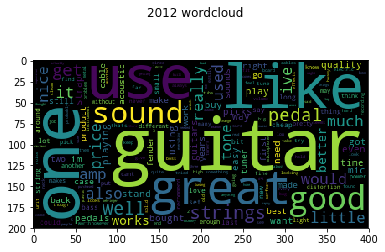

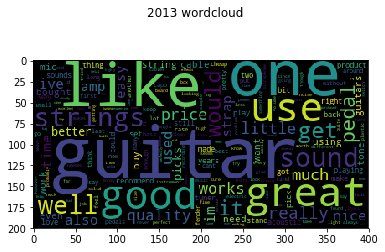

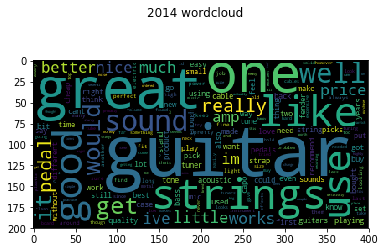

In [0]:
def flat_list(column):
    corpus = []
    for row in column:
        for w in row.split(' '):
            corpus.append(w)
    return corpus

def corpus_creator(text_col):
    corpus = text_col.rdd \
                    .flatMap(flat_list) \
                    .map(lambda x: (x, 1)) \
                    .reduceByKey(lambda x, y: x+y ) \
                    .sortBy(lambda x: x[1], ascending=False) \
                    .toDF() \
                    .withColumnRenamed('_1','reviewText') \
                    .withColumnRenamed('_2','count')
    return corpus

def annual_reviews(year):
    annual_reviews = reviews.select('text_nosw') \
                        .filter('YEAR(FROM_UNIXTIME(unixReviewTime))=={}'.format(year)) \
                        .withColumnRenamed('text_nosw','reviewText')
    return annual_reviews

def wordcloud(corpus_sdf, text_name='reviewText'):
    corpus_pdf = corpus_sdf.limit(500).toPandas()

    corpus_dict = {}
    for index, row in corpus_pdf.iterrows():
        corpus_dict[row[text_name]] = row['count']
        
    wordcloud = WordCloud().generate_from_frequencies(corpus_dict)
    plt.imshow(wordcloud);


years_list = list(range(2012, 2015))

annual_corpora = {}
for year in years_list:
    annual_corpora[str(year)] = corpus_creator(annual_reviews(year))

for key,value in annual_corpora.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value)
    fig.suptitle('{} wordcloud'.format(key))

## Entity Recognition
- The issue with the Bag of Words approach is that non-descriptive words come to the top, which aren't stopwords.
- We turn to Spark NLP's entity recognition now to filter only on Entities which would better bring popular themes to the surface

Doesn't work on Databricks but works on downloaded notebook

In [0]:
def make_string(x):
    string = ''
    for x in x:
        string += x + ' '
    return string

make_string = udf(make_string)
spark.udf.register("make_string", make_string)

pipeline = PretrainedPipeline('explain_document_dl', 'en')

annual_entities = {}
for year in years_list:
    entities_filtered = pipeline.transform(annual_corpora[str(year)].withColumnRenamed("reviewText", "text")) \
                                .select('text','count',
                                        col('entities.result').alias('entities'),
                                        col('pos.result').alias('pos'))
    entities_filtered = entities_filtered.withColumn('entities',make_string('entities'))\
                                        .withColumn('pos',make_string('pos'))\
                                        .filter('entities <> ""')
    annual_entities[str(year)] = entities_filtered

print("hello")
for key,value in annual_entities.items():
    fig, ax = plt.subplots()
    ax = wordcloud(value, text_name='text')
    fig.suptitle('{} wordcloud'.format(key))

explain_document_dl download started this may take some time.
Approx size to download 168.4 MB
[ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][OK!]
hello